In [1]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import utils

In [2]:
df_accept = utils.parsing_openreview_hdf5()
df_accept.head()

,rating,decision,title,mean_rating,var_rating
0,"[4, 9, 10, 7]",Accept (Poster),Exploration By Random Network Distillation,7.500000,5.250000
1,"[7, 6, 6]",Accept (Poster),Generating Multi-agent Trajectories Using Prog...,6.333333,0.222222
2,"[8, 6, 6]",Accept (Poster),Stable Opponent Shaping In Differentiable Games,6.666667,0.888889
3,"[4, 7, 6]",Accept (Poster),A Closer Look At Deep Learning Heuristics: Lea...,5.666667,1.555556
4,"[6, 6, 6]",Accept (Poster),Feed-forward Propagation In Probabilistic Neur...,6.000000,0.000000


In [3]:
with open("./data/googlescholar_paper_info_2022_04_19.json", 'r') as f:
    raw_citation = json.load(f)
print(len(raw_citation), len(df_accept))

502 502


In [4]:
for pn, val in raw_citation.items():
    df_accept.loc[df_accept.title == pn, "citations"] = val["num_citations"]
df_accept.head()

,rating,decision,title,mean_rating,var_rating,citations
0,"[4, 9, 10, 7]",Accept (Poster),Exploration By Random Network Distillation,7.500000,5.250000,607.0
1,"[7, 6, 6]",Accept (Poster),Generating Multi-agent Trajectories Using Prog...,6.333333,0.222222,42.0
2,"[8, 6, 6]",Accept (Poster),Stable Opponent Shaping In Differentiable Games,6.666667,0.888889,60.0
3,"[4, 7, 6]",Accept (Poster),A Closer Look At Deep Learning Heuristics: Lea...,5.666667,1.555556,120.0
4,"[6, 6, 6]",Accept (Poster),Feed-forward Propagation In Probabilistic Neur...,6.000000,0.000000,13.0


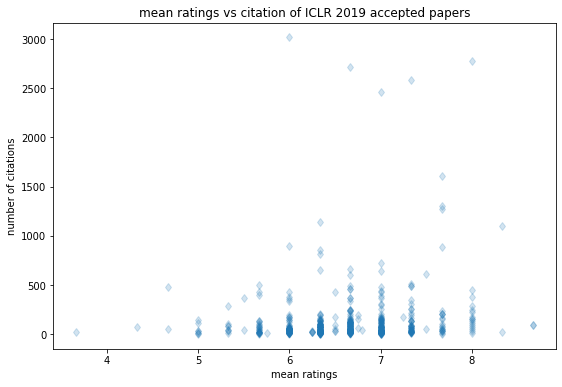

In [5]:
plt.figure(figsize=(9, 6))
plt.plot(df_accept.mean_rating, df_accept.citations, 'd', alpha=0.2)
plt.xlabel("mean ratings")
plt.ylabel("number of citations")
plt.title("mean ratings vs citation of ICLR 2019 accepted papers")
plt.show()

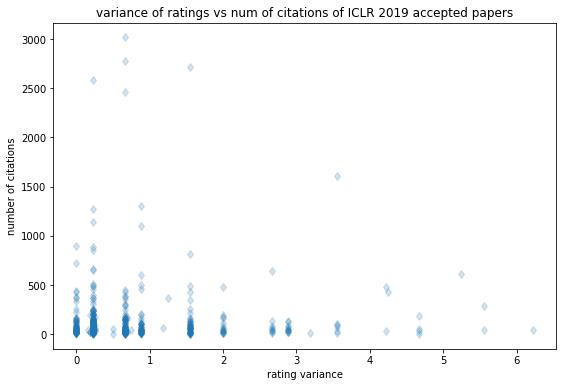

In [6]:
plt.figure(figsize=(9, 6))
plt.plot(df_accept.var_rating, df_accept.citations, 'd', alpha=0.2)
plt.xlabel("rating variance")
plt.ylabel("number of citations")
plt.title("variance of ratings vs num of citations of ICLR 2019 accepted papers")
plt.show()

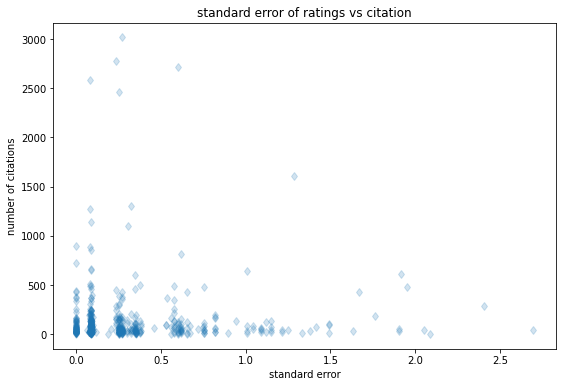

In [7]:
plt.figure(figsize=(9, 6))
standard_error = df_accept.var_rating / np.sqrt(df_accept.mean_rating)
plt.plot(standard_error, df_accept.citations, 'd', alpha=0.2)
plt.xlabel("standard error")
plt.ylabel("number of citations")
plt.title("standard error of ratings vs citation")
plt.show()